In [1]:
# Import libraries
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\13346\\OneDrive\\Desktop\\delhivery_data.csv'

df = pd.read_csv(file_path)

# Preview the data
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [2]:
# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

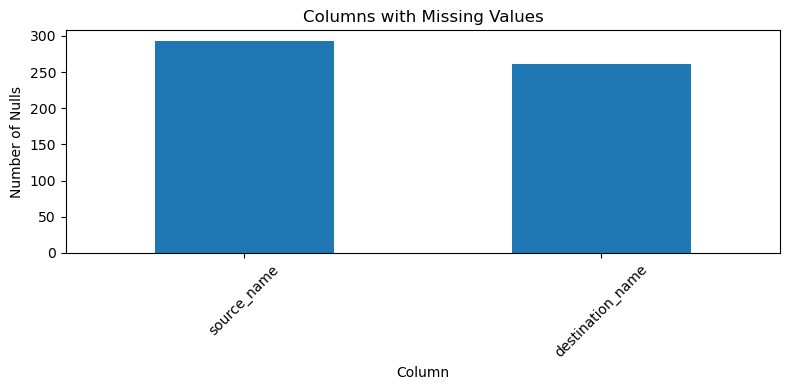

In [3]:
# Total missing values per column
df.isnull().sum()
import matplotlib.pyplot as plt

# Step 1: Get columns with missing values
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]  # keep only columns with nulls

# Step 2: Plot
plt.figure(figsize=(8, 4))
null_counts.plot(kind='bar')
plt.title('Columns with Missing Values')
plt.xlabel('Column')
plt.ylabel('Number of Nulls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
#Null investigation
# Filter rows where either source_name or destination_name is null
null_rows = df[df['source_name'].isnull() | df['destination_name'].isnull()]

# How many total null rows?
print(f"Total rows with nulls: {len(null_rows)}")

# Preview these rows
null_rows[['trip_creation_time', 'source_center', 'destination_center', 'route_type']].head()


Total rows with nulls: 551


,trip_creation_time,source_center,destination_center,route_type
110,2018-09-25 08:53:04.377810,IND342601AAA,IND342902A1B,FTL
111,2018-09-25 08:53:04.377810,IND342601AAA,IND342902A1B,FTL
112,2018-09-25 08:53:04.377810,IND342902A1B,IND302014AAA,FTL
113,2018-09-25 08:53:04.377810,IND342902A1B,IND302014AAA,FTL
114,2018-09-25 08:53:04.377810,IND342902A1B,IND302014AAA,FTL


In [5]:
# All 551 null rows have the exact same trip_creation_time and are clustered around a few specific source/destination centers.
# This strongly suggests:These nulls are likely from a single batch of trips created at the same time (possibly a system glitch or incomplete logging).
#The centers are also clustered (IND342601AAA, IND342902A1B, etc.),The route_type is consistently FTL

null_rows['trip_creation_time'].nunique()

null_rows['trip_creation_time'].value_counts().head(5)


2018-10-03 09:06:06.690094    14
2018-09-29 09:13:40.263937    14
2018-09-27 09:57:22.407682    14
2018-09-22 09:27:45.870844    14
2018-09-24 23:25:39.732847    14
Name: trip_creation_time, dtype: int64

In [6]:
print(null_rows['source_center'].nunique(), "unique source centers")
print(null_rows['destination_center'].nunique(), "unique destination centers")

null_rows['source_center'].value_counts()
null_rows['destination_center'].value_counts()


33 unique source centers
29 unique destination centers


IND282002AAD    151
IND302014AAA     90
IND474003AAA     49
IND205001AAB     42
IND281004AAA     20
IND131301AAA     20
IND518002AAA     17
IND342902A1B     16
IND577116AAA     16
IND577101AAA     16
IND852118A1B     15
IND505326AAB     11
IND126116AAA     10
IND841301AAC      9
IND509103AAC      9
IND250002AAC      9
IND204101AAA      9
IND122015AAC      8
IND110037AAM      8
IND841226AAB      5
IND462022AAA      4
IND465333A1B      3
IND331001A1C      3
IND854326AAB      3
IND505425AAA      2
IND505327AAA      2
IND465333AAA      2
IND221005A1A      1
IND505001AAB      1
Name: destination_center, dtype: int64

In [7]:
#Null Investigation Conclusion: Nulls Are Not Random: They are clustered in batches — e.g., 14 records each created at the exact same second.There are only 33 unique source centers and 29 unique destination centers affected. 
#One source center (IND282002AAD) alone has 151 null rows.Others follow in similarly sized clusters.
#Possible cause: The nulls likely stem from system-level issues such as a failed API call or a failed batch process. 

#Fix for this issue is to use ID's instead of Names-Drop Names
df = df.drop(['source_name', 'destination_name'], axis=1)

In [8]:
print(f"Shape: {df.shape}")
df.describe(include='all').T


Shape: (144867, 22)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
data,144867,2,training,104858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_creation_time,144867,14817,2018-09-28 05:23:15.359220,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_schedule_uuid,144867,1504,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route_type,144867,2,FTL,99660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_uuid,144867,14817,trip-153811219535896559,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_center,144867,1508,IND000000ACB,23347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_center,144867,1481,IND000000ACB,15192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
od_start_time,144867,26369,2018-09-21 18:37:09.322207,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
od_end_time,144867,26369,2018-09-24 09:59:15.691618,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_scan_to_end_scan,144867.0,NaN,NaN,NaN,961.262986,1037.012769,20.0,161.0,449.0,1634.0,7898.0


In [9]:
#Target Variables Analysis
# Create binary target feature is_delayed
df['is_delayed'] = (df['actual_time'] > df['osrm_time']).astype(int)

#Create continuous target feature delay_minutes
df['delay_minutes'] = df['actual_time'] - df['osrm_time']

# Preview
df[['actual_time', 'osrm_time', 'delay_minutes', 'is_delayed']].head()

,actual_time,osrm_time,delay_minutes,is_delayed
0,14.0,11.0,3.0,1
1,24.0,20.0,4.0,1
2,40.0,28.0,12.0,1
3,62.0,40.0,22.0,1
4,68.0,44.0,24.0,1


In [10]:
# Convert to Datetime
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

# Extract time-based features
df['trip_hour'] = df['trip_creation_time'].dt.hour
df['trip_dayofweek'] = df['trip_creation_time'].dt.day_name()
df['trip_month'] = df['trip_creation_time'].dt.month


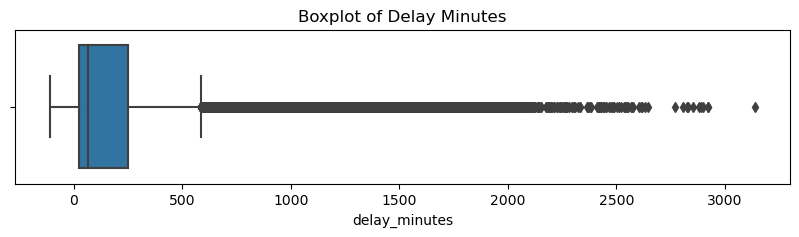

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary stats
df['delay_minutes'].describe()

# Boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['delay_minutes'])
plt.title('Boxplot of Delay Minutes')
plt.show()


In [12]:
# We have extreme right skew in our continuous variable delay_minutes. The upper bound of the IQR range is 500-700 minutes and everything beyond this is considered an outlier. Next step is to cap the outliers using Winsorization. 
# Calculate IQR
q1 = df['delay_minutes'].quantile(0.25)
q3 = df['delay_minutes'].quantile(0.75)
iqr = q3 - q1

# Bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap values
df['delay_minutes_capped'] = df['delay_minutes'].clip(lower=lower_bound, upper=upper_bound)


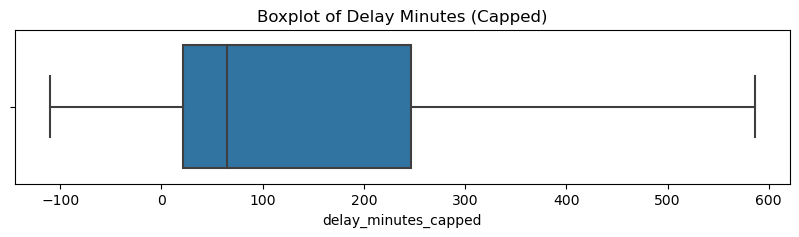

In [13]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['delay_minutes_capped'])
plt.title('Boxplot of Delay Minutes (Capped)')
plt.show()


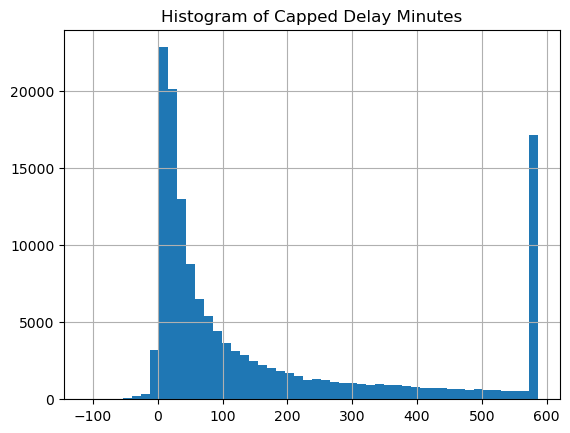

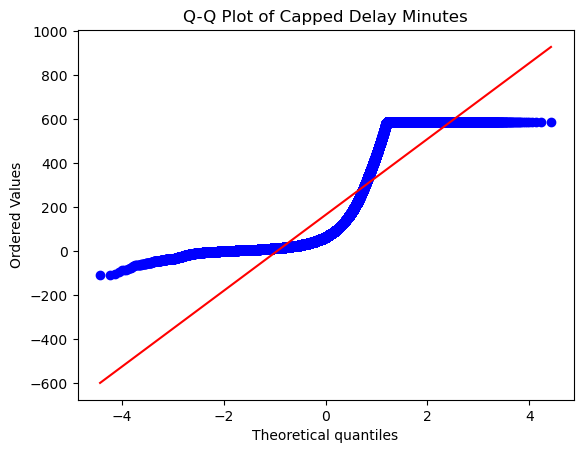

Shapiro-Wilk Test: Stat=0.753, p=0.00000


In [14]:
#Checking normality of capped values
from scipy.stats import shapiro, probplot

# Histogram
df['delay_minutes_capped'].hist(bins=50)
plt.title("Histogram of Capped Delay Minutes")
plt.show()

# Q-Q plot
probplot(df['delay_minutes_capped'].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot of Capped Delay Minutes")
plt.show()

# Shapiro-Wilk test (use sample if dataset is large)
sample = df['delay_minutes_capped'].dropna().sample(3000, random_state=42)
stat, p = shapiro(sample)
print(f"Shapiro-Wilk Test: Stat={stat:.3f}, p={p:.5f}")

In [15]:
#Even after the initial capping, there is still a right skew. The spike at 600 is from winsorization. The Q-Q plot confirms non-normal distribution, even after capping. 
#Next Step is Log Transformation dur to the extreme right skew and  extreme outliers.

import numpy as np

# Only apply log1p to valid (non-negative) values
df['delay_log'] = df['delay_minutes_capped'].apply(lambda x: np.log1p(x) if x >= 0 else np.nan)


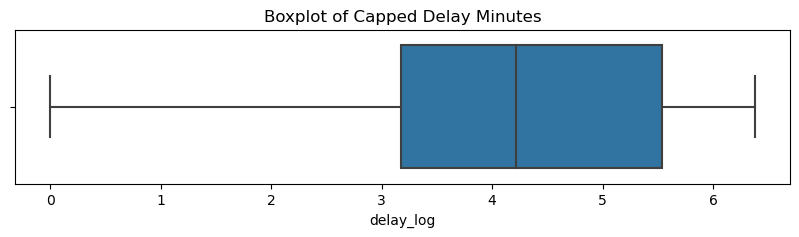

In [16]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['delay_log'])
plt.title('Boxplot of Capped Delay Minutes')
plt.show()

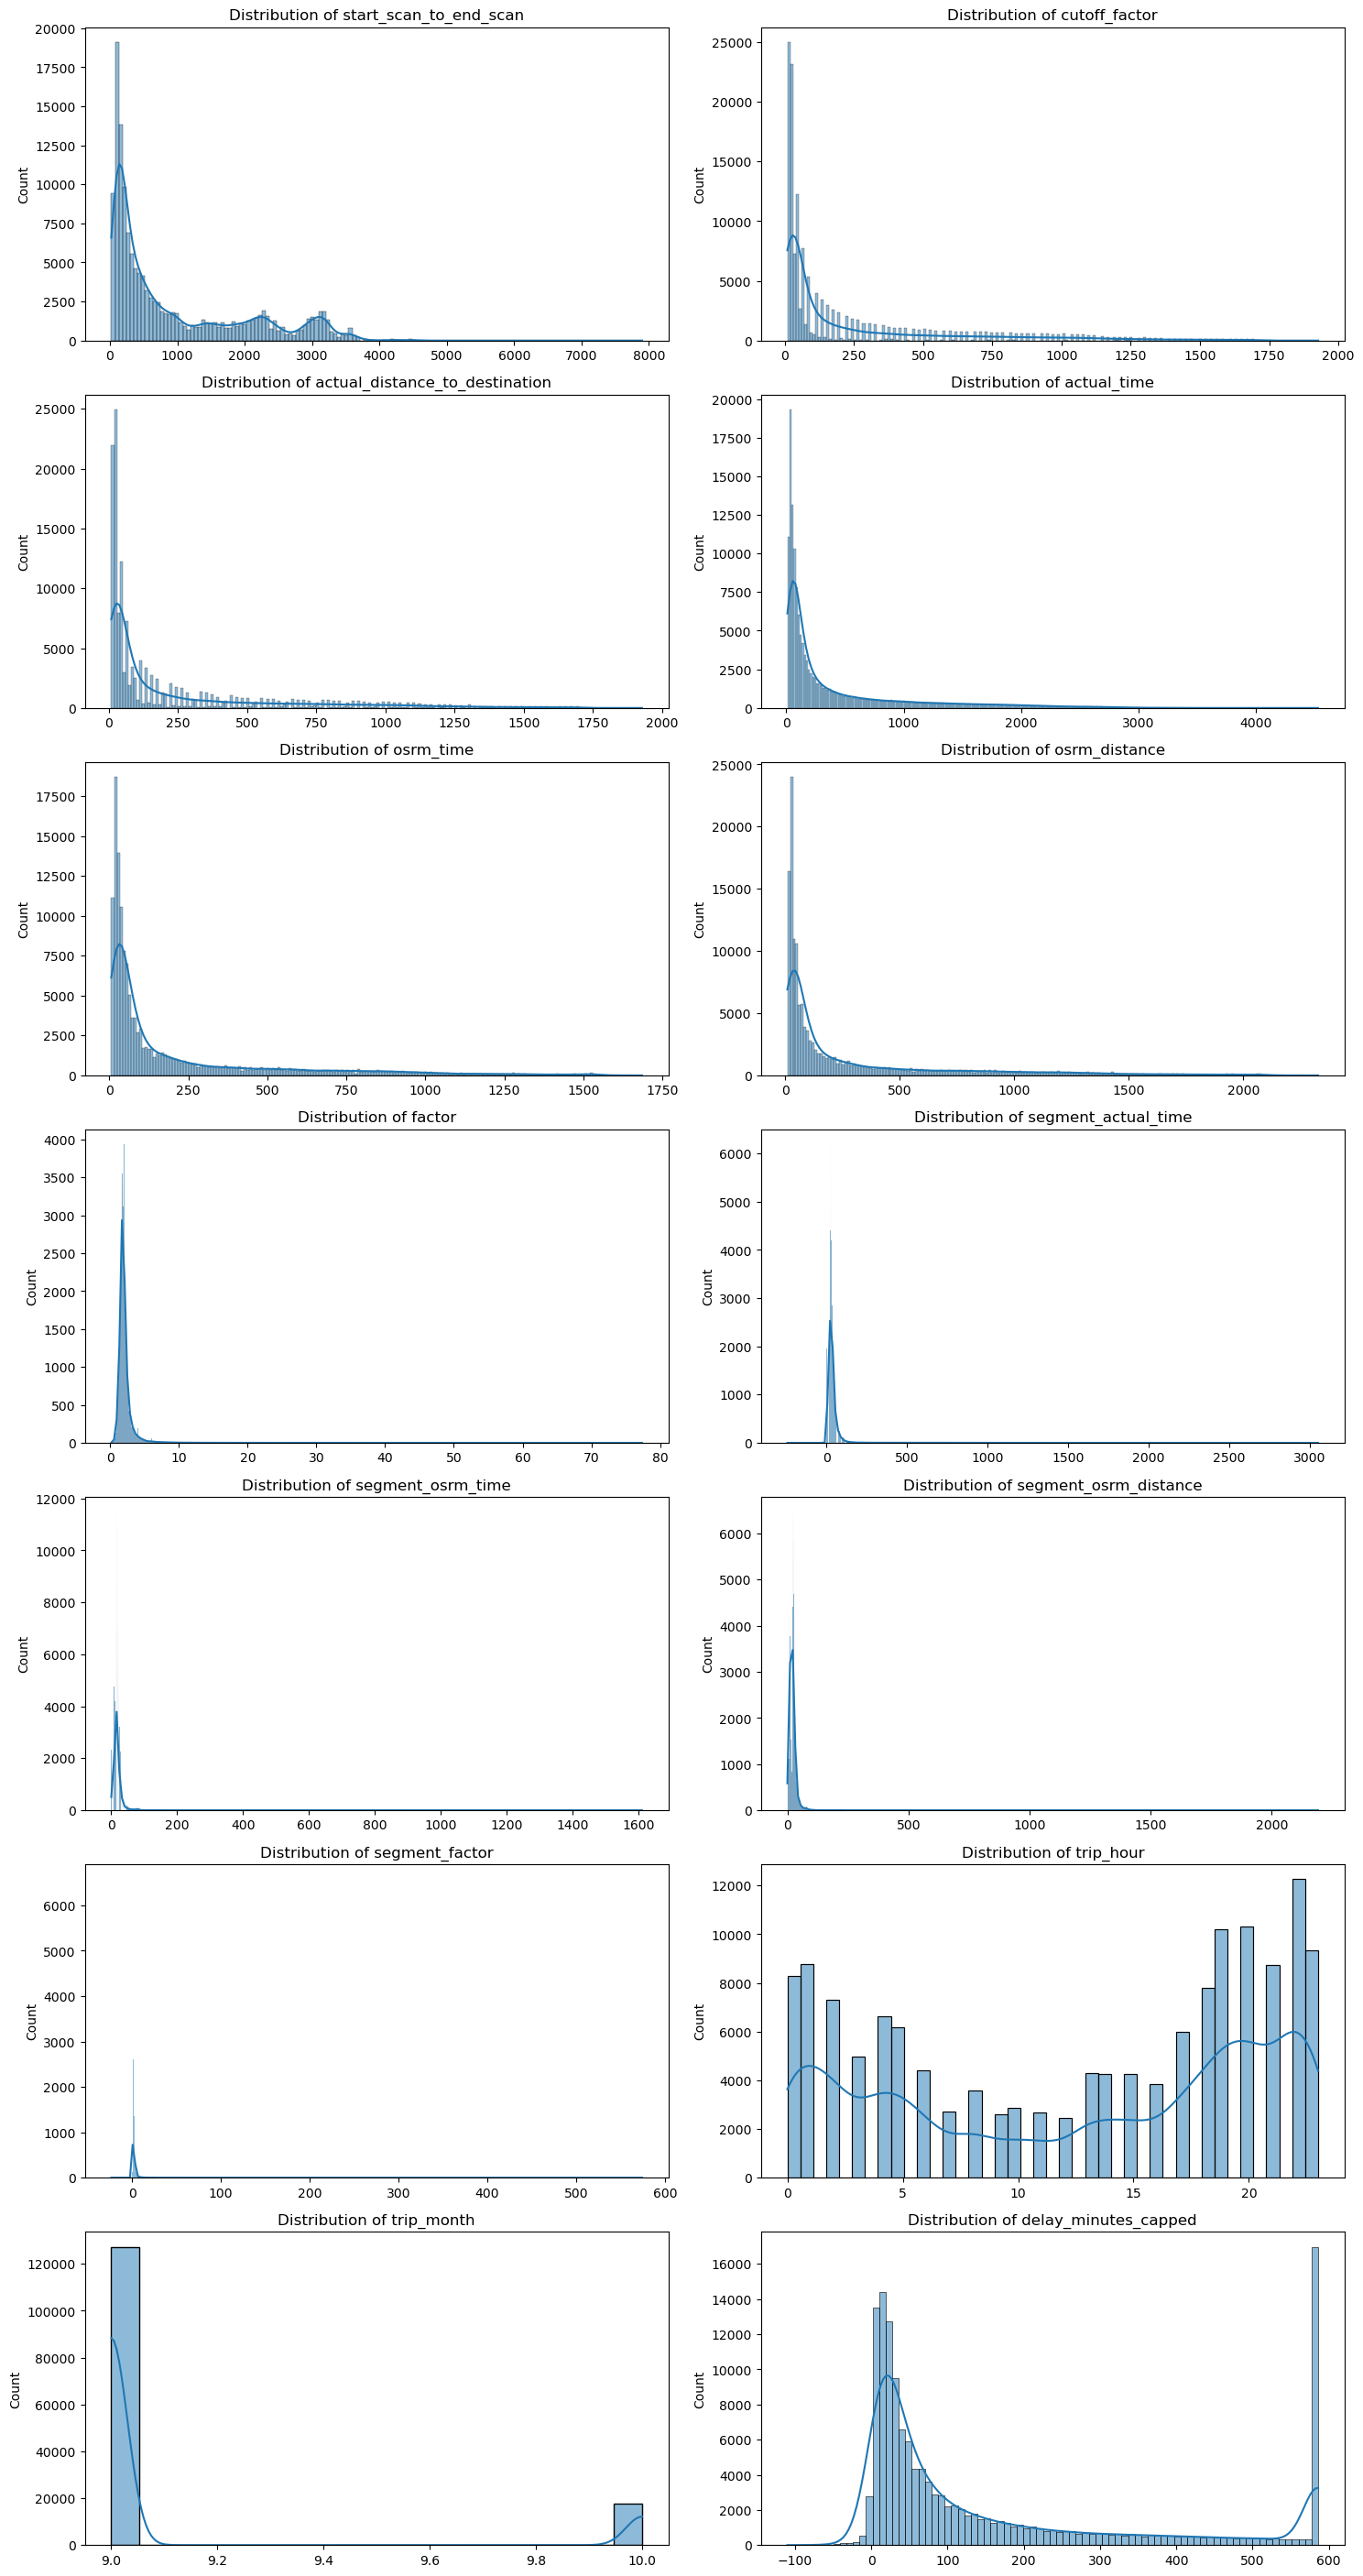

In [17]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Drop delay-related columns (already analyzed)
cols_to_plot = numeric_cols.drop(['delay_minutes', 'delay_log']) if 'delay_log' in numeric_cols else numeric_cols.drop(['delay_minutes'])

# Set up the figure
fig, axes = plt.subplots(nrows=len(cols_to_plot) // 2 + 1, ncols=2, figsize=(15, 4 * (len(cols_to_plot)//2 + 1)))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.histplot(df[col].dropna(), ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    
# Hide any unused plots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

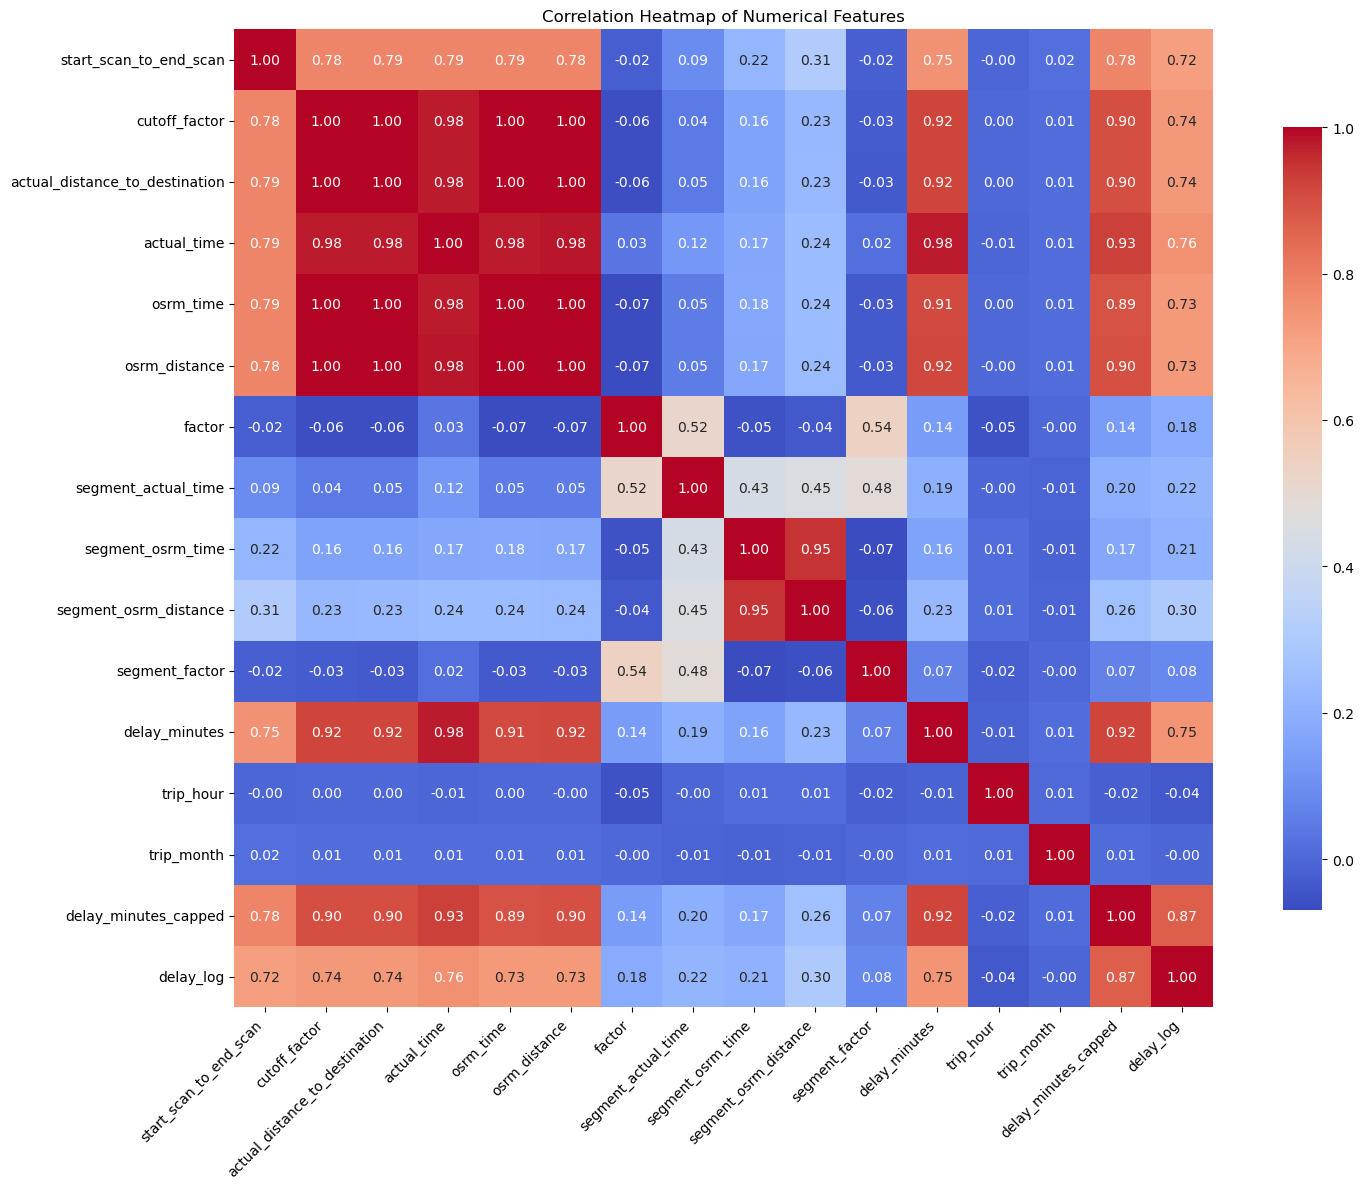

In [18]:
#Even though there continues to be some skewnewss in the variables, I am going to continue with EDA and look at a correlation heatmap due to the possibility of linear relationships between variales. 
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric features for correlation
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Set up the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [19]:
#Key observations: Highly Correlated Features (Correlation > 0.9): cutoff_factor, actual_distance_to_destination, osrm_time, osrm_distance, and actual_time are almost perfectly correlated.
#Most likely do not need all of these in  model—might introduce multicollinearity.
# Low Correlation Features:trip_hour and trip_month show very weak correlation with the target. They might still hold some interaction effects but won't help much as standalone predictors.
# Target Feature:  delay_minutes is the base target,  already engineered delay_minutes_capped and delay_log, which show slightly reduced but still strong correlation (0.87 and 0.75, respectively). That’s expected due to transformation and capping.

#Next steps: Create Deltas/Ratios
#Time Delta
df['time_diff_vs_osrm'] = df['actual_time'] - df['osrm_time']

#Distance Delta
df['distance_diff_vs_osrm'] = df['actual_distance_to_destination'] - df['osrm_distance']

#Efficiency Ratio
df['time_per_km'] = df['actual_time'] / df['actual_distance_to_destination']

#Performance Ratio
df['osrm_time_ratio'] = df['actual_time'] / df['osrm_time']



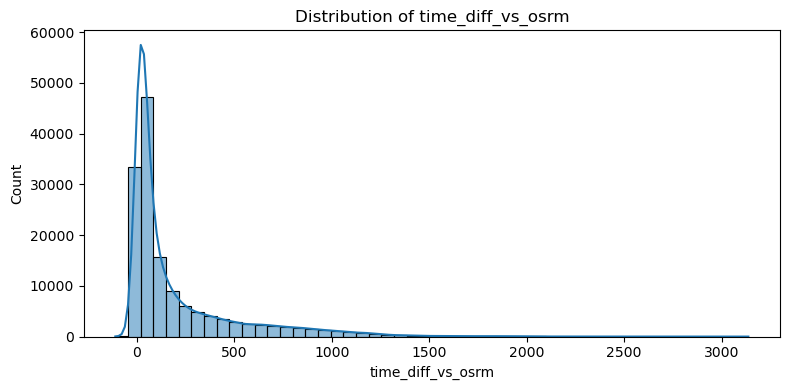

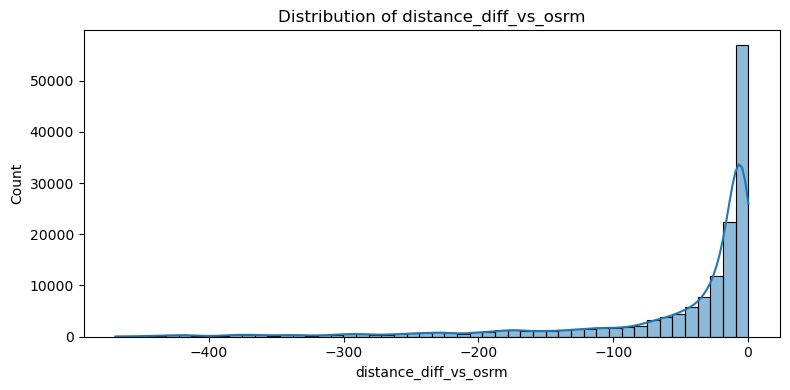

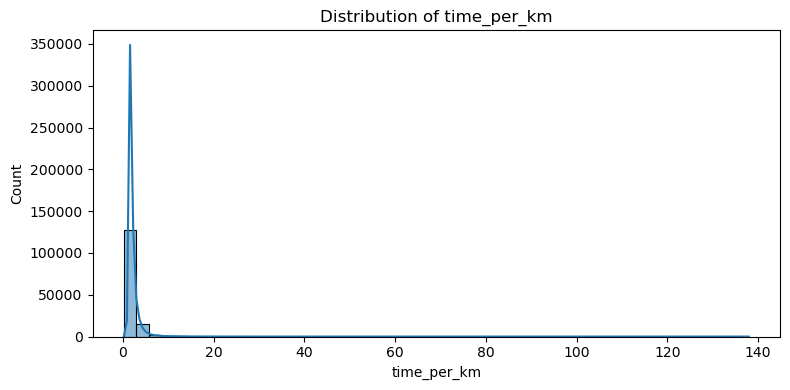

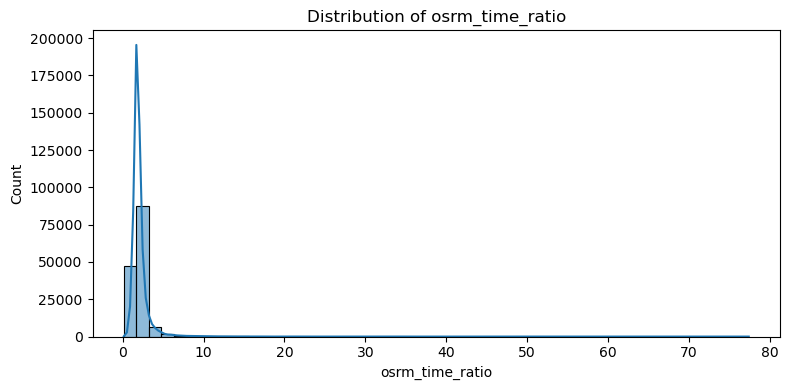

In [20]:
#Visualize new features
# Select engineered features
engineered_features = ['time_diff_vs_osrm', 'distance_diff_vs_osrm', 'time_per_km', 'osrm_time_ratio']

# Plot distributions
for feature in engineered_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=50)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [21]:
# Correlation with delay
df[engineered_features + ['delay_log']].corr()['delay_log'].sort_values(ascending=False)


delay_log                1.000000
time_diff_vs_osrm        0.748983
osrm_time_ratio          0.183587
time_per_km              0.095450
distance_diff_vs_osrm   -0.667977
Name: delay_log, dtype: float64

In [22]:
#The new engineered features have strong correlations with delay_log: 
# time_diff_vs_osrm: 0.75 → strong, as expected. This feature likely reflects actual delays most directly.
# distance_diff_vs_osrm: -0.67 → strong inverse. Possibly longer distances are better planned? Or this flags underestimation.
# osrm_time_ratio: 0.18 → weak, but intuitive: how far off the trip time is from expectations.
# time_per_km: 0.09 → very weak; not informative alone.

# Next Steps: Feature Selection
# Drop Identifiers: route_schedule_uuid, trip_uuid
# Redundant time columns (already created deltas/ratios):actual_time, osrm_time, start_scan_to_end_scan
# Redundant distance columns: actual_distance_to_destination, osrm_distance
# Raw delay_minutes(using delay_log now)
# Other Columns :trip_creation_time, od_start_time, od_end_time (already extracted hour/month), cutoff_timestamp, is_cutoff, cutoff_factor, factor, segment_factor (unknown meaning)
columns_to_drop = [
    'route_schedule_uuid', 'trip_uuid',
    'trip_creation_time', 'od_start_time', 'od_end_time',
    'actual_time', 'osrm_time', 'start_scan_to_end_scan',
    'actual_distance_to_destination', 'osrm_distance',
    'delay_minutes', 'delay_minutes_capped',
    'cutoff_timestamp', 'is_cutoff', 'cutoff_factor',
    'factor', 'segment_factor'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix

# Select numeric features (excluding target 'delay_log')
numeric_df = df.select_dtypes(include=['number']).drop(columns=['delay_log'])

# Build design matrix for predictors only
X_vif = dmatrix("+".join(numeric_df.columns), data=df, return_type='dataframe')

# Calculate VIF
vif_df = pd.DataFrame()
vif_df["feature"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_df = vif_df.sort_values(by='VIF', ascending=False)
vif_df


,feature,VIF
0,Intercept,843.934998
3,segment_osrm_distance,13.069113
2,segment_osrm_time,12.481113
9,time_per_km,7.889372
10,osrm_time_ratio,7.661617
7,time_diff_vs_osrm,4.328833
8,distance_diff_vs_osrm,4.177346
1,segment_actual_time,2.127357
4,is_delayed,1.064761
5,trip_hour,1.004913


In [31]:
# Define features and target
# Drop rows with missing target values
df_model = df.dropna(subset=['delay_log'])

# Redefine X and y using the cleaned data
X = df_model[[
    'segment_osrm_time',
    'time_per_km',
    'osrm_time_ratio',
    'time_diff_vs_osrm',
    'distance_diff_vs_osrm',
    'segment_actual_time',
    'is_delayed',
    'trip_hour',
    'trip_month'
]]

y = df_model['delay_log']

In [32]:
from sklearn.model_selection import train_test_split

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [33]:
# Baseline Linear Regression Model 
from sklearn.linear_model import LinearRegression

# Initialize and fit model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" Mean Absolute Error (MAE):     {mae:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" R-squared (R² Score):            {r2:.2f}")


 Mean Absolute Error (MAE):     0.73
 Root Mean Squared Error (RMSE): 0.89
 R-squared (R² Score):            0.62


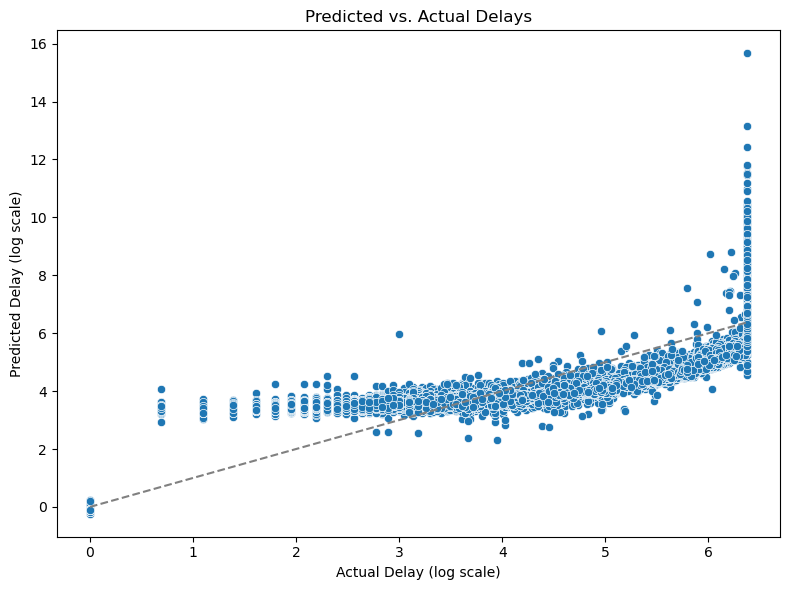

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Delay (log scale)")
plt.ylabel("Predicted Delay (log scale)")
plt.title("Predicted vs. Actual Delays")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')  # Reference line
plt.tight_layout()
plt.show()


In [ ]:
# Interpretation of results: # Mean Absolute Error (MAE = 0.73): 
# On average, the predicted log delay deviates from the actual log delay by 0.73. In the original (non-log) space, this translates to multiplicative error (as log-transformed targets are exponential when reversed). 
# Root Mean Squared Error (RMSE = 0.89): # Slightly higher than MAE, indicating some influence from outliers or high-variance samples, though not dramatically. # R² Score (0.62):The model explains 62% of the variance in the delay (on log scale), which is solid for a linear model in a logistics context with natural variability. # Scatterplot Insights: # Predictions track the general trend well. 
# There's compression at the lower end (under-prediction of smaller delays). # At high actual delays, there's some underestimation and spread, indicating the model struggles with extremes (as expected with linear models).

# Scatterplot Insights:
# The predicted vs. actual plot shows a clear upward trend, confirming the model captures the general delay structure.
# The lower-left compression suggests bias toward overprediction for small actual delays (log values < 2).
# AAs actual delays increase, prediction variance widens, and a tendency to underpredict extreme delays emerges — a common limitation of linear models under non-linear or heteroscedastic target behavior.

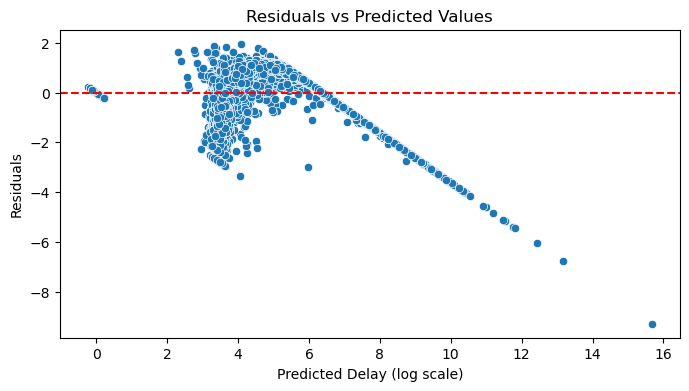

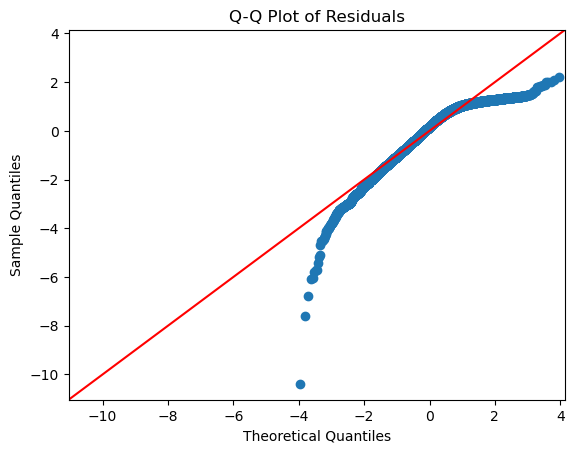

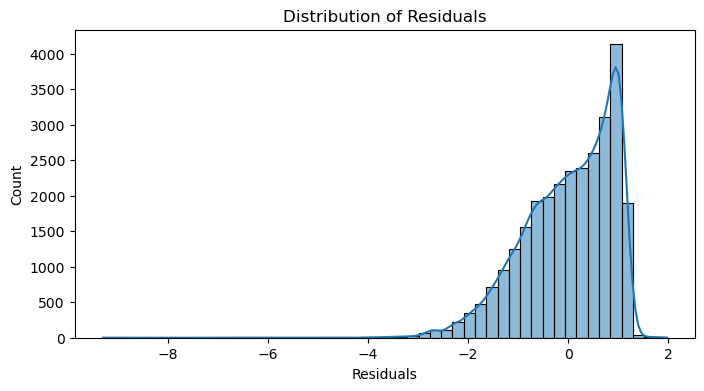

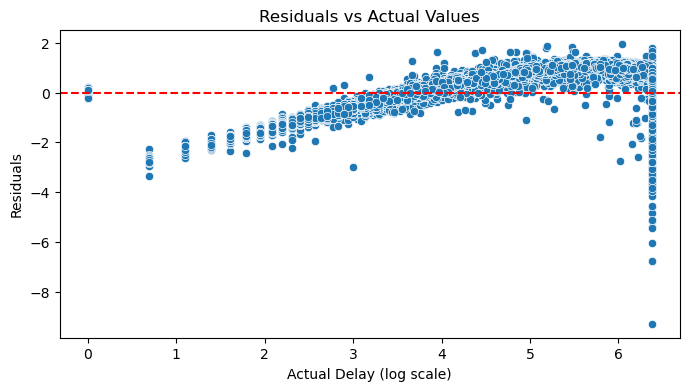

Durbin-Watson statistic: 2.03


In [37]:
#Residual Diagnostics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - y_pred

# 1. Residuals vs Fitted values
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Delay (log scale)')
plt.ylabel('Residuals')
plt.show()

# 2. Q-Q plot to check normality
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Histogram of residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=50)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

# 4. Residuals vs Actual values
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Delay (log scale)')
plt.ylabel('Residuals')
plt.show()

# 5. Durbin-Watson Test for Autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat:.2f}")


In [ ]:
# Residual Analysis
# Residual vs. Predicted Values: Clear funnel shape: Residual variance increases with predicted delay values. This suggests heteroscedasticity, which violates a key OLS assumption (constant variance of errors). Non-random pattern: Indicates that the model isn’t capturing non-linear relationships well, especially for higher delays. 
# Q-Q Plot: Residuals deviate from the red line at both tails, especially the lower end. This shows non-normality of residuals. Normality assumption is violated, especially in the lower quantiles — likely due to outliers or left-skew.
# The histogram is right-skewed with a long left tail. There’s a pile-up near zero (as expected with log-transformed targets), but also extreme negative residuals, which explain underprediction in some cases.
# There is a visible pattern rather than a random scatter, especially at the extremes. The residuals appear to become more negative at higher actual values, another sign of underfitting in extreme delay cases.

# Statistical Implications: 
# Heteroscedasticity: Violates one of the Gauss-Markov assumptions, reducing the efficiency of coefficient estimates. 
# This can be mitigated in future models by: Transforming variables (e.g. Box-Cox, log features); using models that don’t assume constant variance such as gradient boosting or random forests; or applying robust regression techniques.
# Non-normality of residuals: Mostly important for inference(confidence intervals, p-values), which may not be critical, but still affects interpretability and reliability.
# Model Bias: The residuals show systematic underprediction at higher values — this indicates that a linear model may be too simplistic for capturing the true functional form.

# While linear regression provides a useful baseline, residual diagnostics reveal significant violations of its assumptions, namely heteroscedasticity, non-normality of errors, and inability to capture non-linear relationships. These issues suggest that a linear model is not sufficient to model the complexity and variability inherent in real-world logistics delays, especially in edge cases and long-tail events. Consequently, a more flexible and robust modeling approach is warranted.

# Given the presence of both linear global trends and complex, nonlinear interactions within the logistics delay data, a hybrid ensemble model enables us to capture the strengths of both parametric and non-parametric learners. Linear models offer interpretability and efficiency for additive effects, while tree-based models such as Random Forests and XGBoost effectively handle feature interactions, non-linearity, and heteroscedasticity. By stacking these models in an ensemble, we reduce bias and variance simultaneously, achieving improved generalization performance in high-dimensional, noisy environments typical of supply chain systems.